# Machine Learning Regression Model

In [10]:
???

Object `?` not found.


Classification Model | Regression Model
-|-
![](src/pred_classification.png) | ![](src/pred_regression.png)

## [ ] Load the data

In [1]:
import pandas as pd

df = pd.read_excel('data/Microsoft_LinkedIn_Processed.xlsx', parse_dates=['Date'], index_col=0)
df

,Open,High,Low,Close,Adj Close,Volume,change_tomorrow,change_tomorrow_direction
Date,,,,,,,,
2016-12-08,61.299999,61.580002,60.840000,61.009998,55.705235,21220800,1.549141,UP
2016-12-09,61.180000,61.990002,61.130001,61.970001,56.581772,27349400,0.321694,UP
2016-12-12,61.820000,62.299999,61.720001,62.169998,56.764374,20198100,1.286125,UP
2016-12-13,62.500000,63.419998,62.240002,62.980000,57.503944,35718900,-0.478620,DOWN
2016-12-14,63.000000,63.450001,62.529999,62.680000,57.230022,30352700,-0.159793,DOWN
...,...,...,...,...,...,...,...,...
2023-12-18,369.450012,373.000000,368.679993,372.649994,372.649994,21802900,0.163429,UP
2023-12-19,371.489990,373.260010,369.839996,373.260010,373.260010,20603700,-0.712324,DOWN
2023-12-20,375.000000,376.029999,370.529999,370.619995,370.619995,26316700,0.781714,UP


## Machine Learning Model

### Separate the data

1. Target: which variable do you want to predict?
2. Explanatory: which variables will you use to calculate the prediction?

In [2]:
target = df.change_tomorrow
explanatory = df[['Open','High','Low','Close','Volume']]

In [3]:
target

Date
2016-12-08    1.549141
2016-12-09    0.321694
2016-12-12    1.286125
2016-12-13   -0.478620
2016-12-14   -0.159793
                ...   
2023-12-18    0.163429
2023-12-19   -0.712324
2023-12-20    0.781714
2023-12-21    0.277638
2023-12-22    0.021357
Name: change_tomorrow, Length: 1772, dtype: float64

In [4]:
explanatory

,Open,High,Low,Close,Volume
Date,,,,,
2016-12-08,61.299999,61.580002,60.840000,61.009998,21220800
2016-12-09,61.180000,61.990002,61.130001,61.970001,27349400
2016-12-12,61.820000,62.299999,61.720001,62.169998,20198100
2016-12-13,62.500000,63.419998,62.240002,62.980000,35718900
2016-12-14,63.000000,63.450001,62.529999,62.680000,30352700
...,...,...,...,...,...
2023-12-18,369.450012,373.000000,368.679993,372.649994,21802900
2023-12-19,371.489990,373.260010,369.839996,373.260010,20603700
2023-12-20,375.000000,376.029999,370.529999,370.619995,26316700


### Compute the model

The following model will predict the **numerical increase** of the stock for the following day.

As the variable we predict is numerical, we talk about regression models. In the previous tutorial, we used a classification model since the variable we predicted was categorical (UP or DOWN).

In [5]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [6]:
model_dt = DecisionTreeRegressor(max_depth=15, criterion='squared_error')

In [7]:
model_dt.fit(X=explanatory, y=target)

DecisionTreeRegressor(max_depth=15)

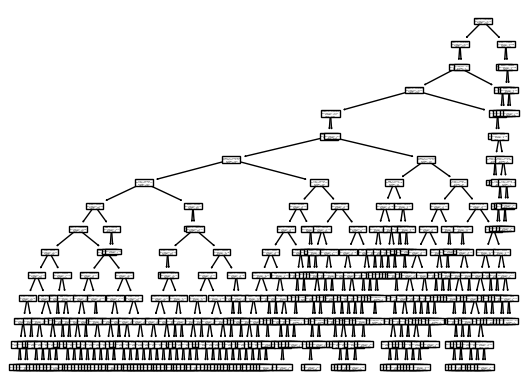

In [8]:
plot_tree(decision_tree=model_dt, feature_names=model_dt.feature_names_in_);

### Calculate the predictions

In [9]:
y_pred = model_dt.predict(X=explanatory)

In [10]:
df_predictions = df[['change_tomorrow']].copy()

df_predictions['prediction'] = y_pred
df_predictions

,change_tomorrow,prediction
Date,,
2016-12-08,1.549141,1.098976
2016-12-09,0.321694,0.472320
2016-12-12,1.286125,1.098976
2016-12-13,-0.478620,-0.806372
2016-12-14,-0.159793,0.280520
...,...,...
2023-12-18,0.163429,0.385932
2023-12-19,-0.712324,-0.022319
2023-12-20,0.781714,0.390720


### Evaluate the model: compare predictions with the reality

In [11]:
model_dt.score(X=explanatory, y=target)

0.5126509788668467

## [ ] How to interpret the error?

In [12]:
df_predictions['error'] = df_predictions.prediction - df_predictions.change_tomorrow

In [13]:
df_predictions.error.sum().round(2)

-0.0

In [14]:
df_predictions['error2'] = df_predictions.error**2

In [15]:
sse = df_predictions.error2.sum()

In [16]:
mse = df_predictions.error2.mean()

In [17]:
import numpy as np

In [18]:
rmse = np.sqrt(mse)

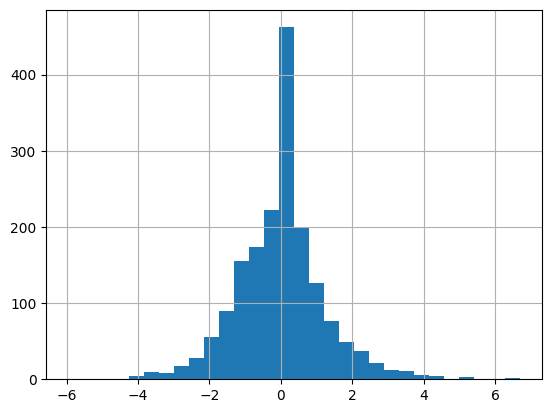

In [19]:
df_predictions.error.hist(bins=30);

The Standard Deviation of the Error|The Normal Distribution
-|-
![](src/std.png) | ![](src/std_normal.png)

source: wikipedia

## Save the model into a file

- We'll write the numbers of the Decision Tree's mathematical equation into a file.

In [20]:
import pickle

In [21]:
with open('models/model_dt_regression.pkl', 'wb') as f:
    pickle.dump(model_dt, f)